# Visualization : Cam EigenCam GradCam

In [20]:
from cams.visualizer import Visualizer
from utils.preprocess import preprocess
from utils.image import get_img_list_raf, img_to_input_tensor, pp_images, pp_blended_heatmaps

## Parameters

In [21]:
MODEL_NAME = 'FERplus-impr-std_0124-1040_weights.h5'
LAST_CONV_NAME = 'block3_conv3'

IMG_SHAPE = (100,100,3)

emotion = 'Anger'
num_imgs = 10

## Input Images

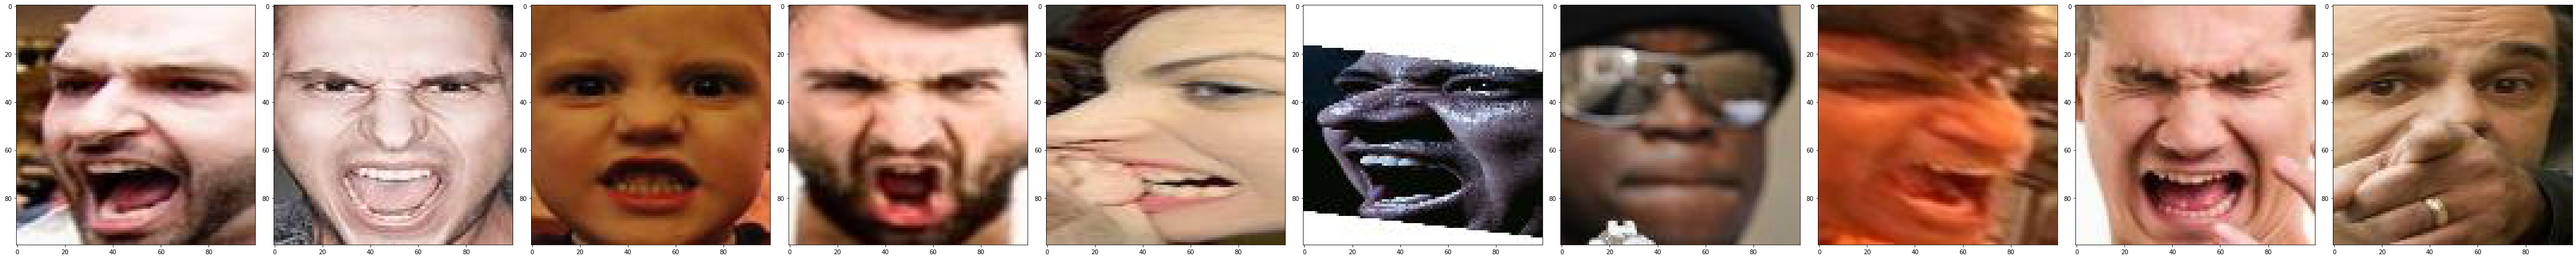

In [22]:
img_list = get_img_list_raf(emotion, num_imgs)
img_tensors = img_to_input_tensor(img_list, IMG_SHAPE)
img_tensors_not_rgb = img_to_input_tensor(img_list, IMG_SHAPE, RGB=False)
pp_images(img_tensors)

## Visualizer

In [23]:
vis = Visualizer(MODEL_NAME, LAST_CONV_NAME, IMG_SHAPE, preprocess)

## get heatmaps : Cam, EigenCam, GradCam

In [24]:
heatmap_CAM, pred_CAM = vis.getCAM(img_tensors_not_rgb)
heatmap_EigenCam, pred_EigenCam = vis.getEigenCAM(img_tensors)
heatmap_GradCam, pred_GradCam = vis.getGradCAM(img_tensors)

2022-01-27 11:02:37.572741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 11:02:37.712313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 11:02:37.891614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## Result

### blended

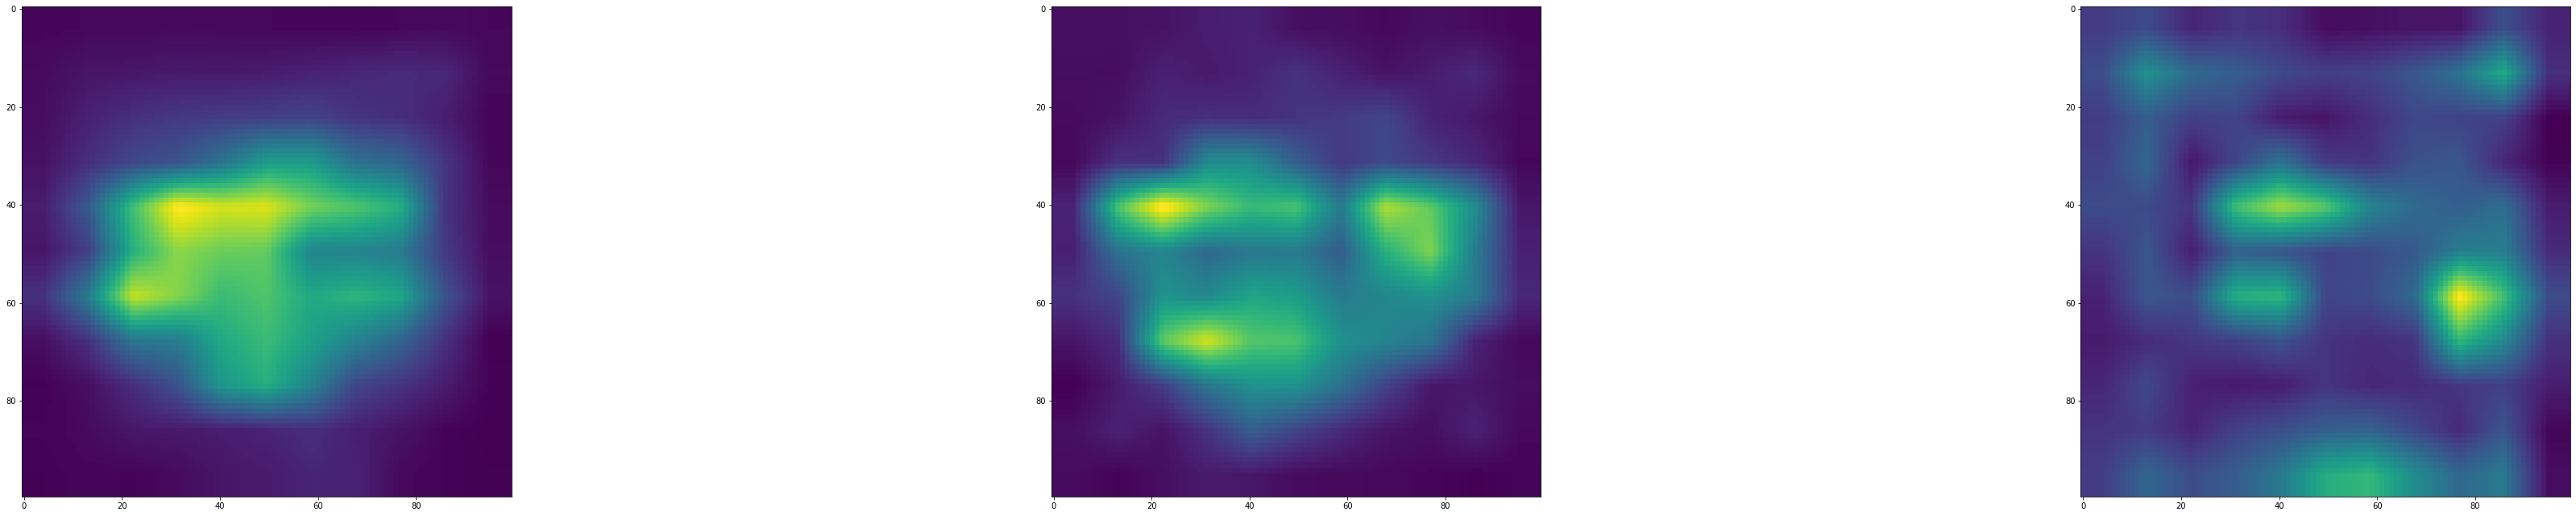

In [25]:
pp_blended_heatmaps([heatmap_CAM,heatmap_EigenCam,heatmap_GradCam])

### Cam

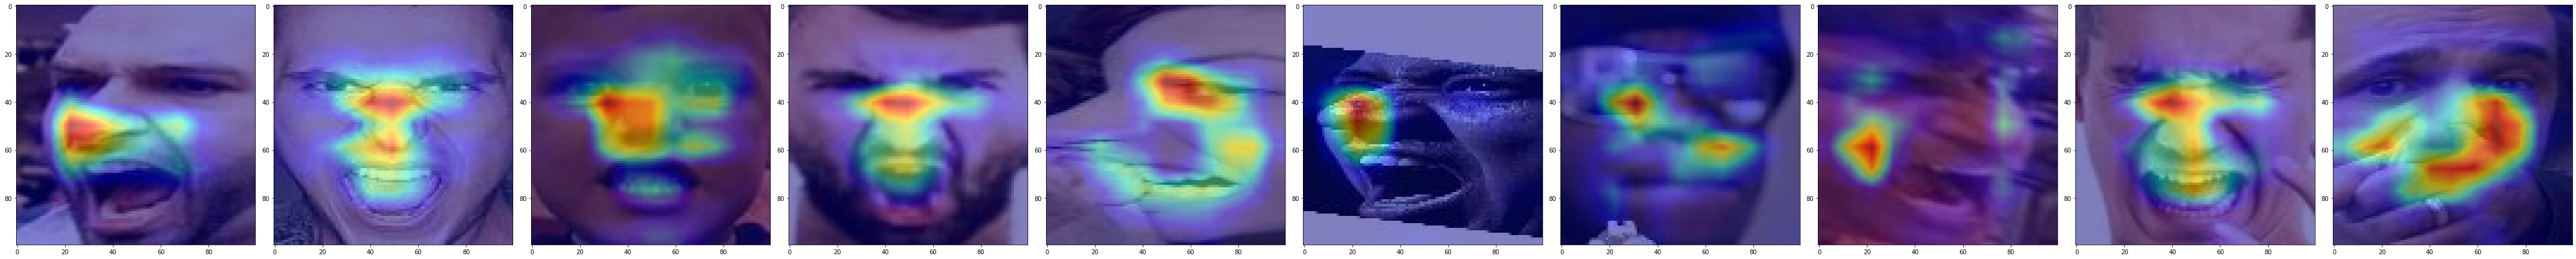

In [26]:
pp_images(img_tensors, heatmap_CAM)

### EigenCam

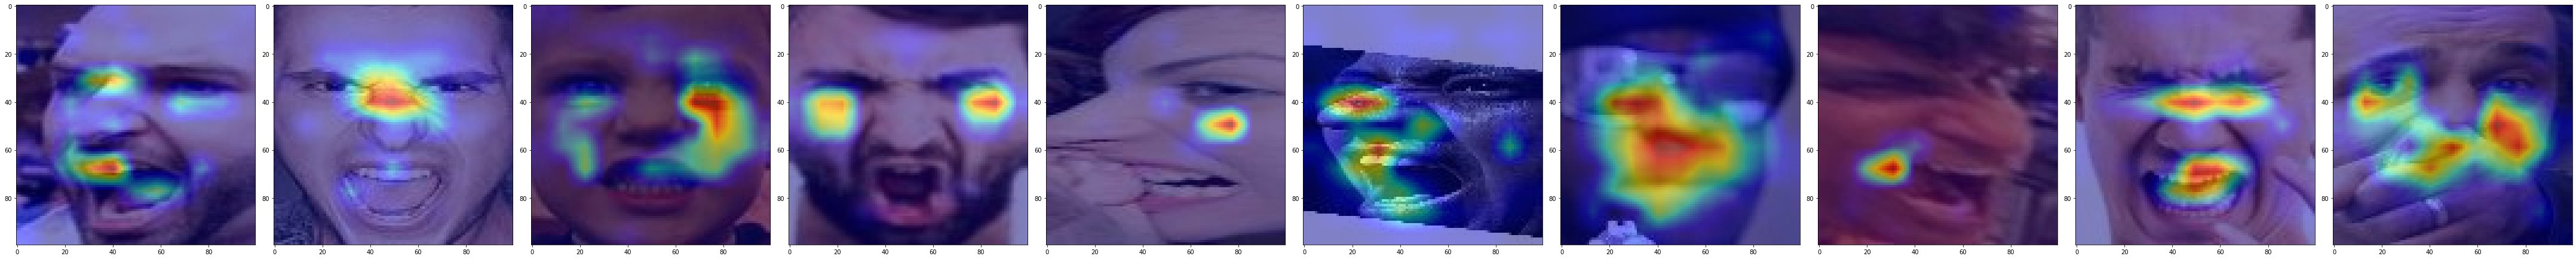

In [27]:
pp_images(img_tensors, heatmap_EigenCam)

### GradCam

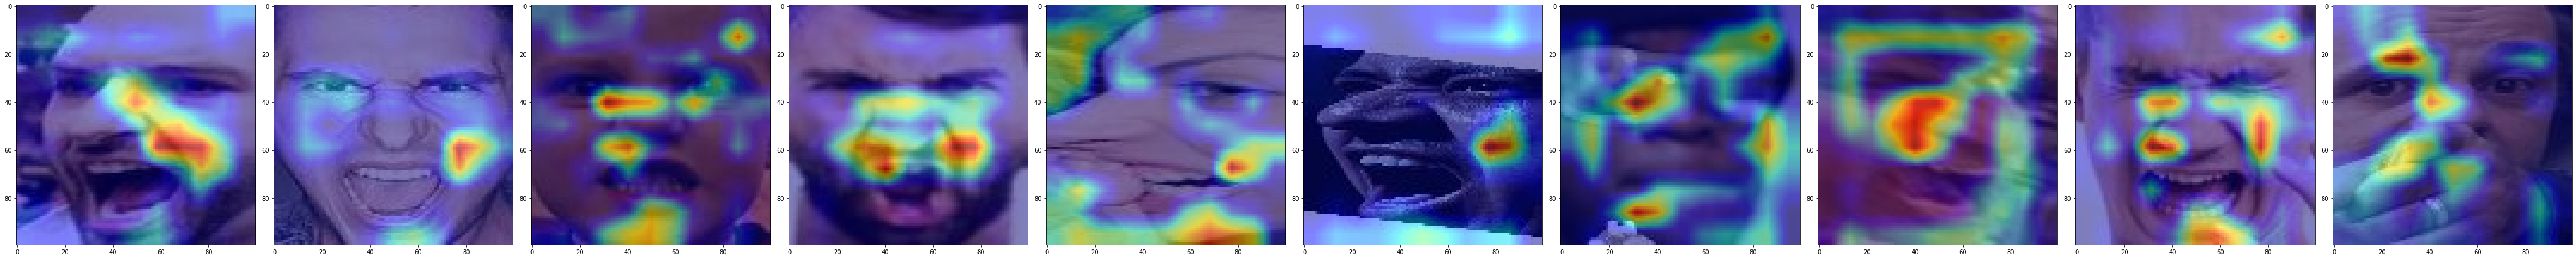

In [28]:
pp_images(img_tensors, heatmap_GradCam)